In [32]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
# import warnings
# warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns 

# Loan Data

## Task: Determine the eligibility for granting Home loan.

Objective of this case study is:

1.   To understand the patterns in the data.
2.   How to Handle the categorical features.
3. How to deal with missing data.
4. Feature Engineering
5. Finding the most important features while taking the decision of granting a loan application.
6. Understanding the Normalization and standardisation of the data.


In [6]:
data = pd.read_csv('loan.csv')

## Let's understand the data first, Necessary data analysis

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.shape

(614, 13)

In [9]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
data.dtypes == "object"

Loan_ID               True
Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area         True
Loan_Status           True
dtype: bool

In [12]:
#object => typically categorical/IDs
#Numeric => Int64, Float64

In [13]:
data.Dependents.value_counts(dropna=False)
## let's call it categorical for now

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [14]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
# drop loanID column
data = data.drop("Loan_ID", axis = 1)

In [16]:
data.describe()
# only numeric features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
data.describe(include = ['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [18]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [19]:
#missing values
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
cat_cols = data.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
print(cat_cols, "\n")

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 



In [21]:
num_cols = data.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
print(num_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [22]:
cat_cols.remove('Loan_Status')

In [23]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [24]:
data[cat_cols].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [25]:
data[num_cols].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


## Loan Status

In [26]:
target = 'Loan_Status'
data[target].value_counts()
# Imbalanced data

Y    422
N    192
Name: Loan_Status, dtype: int64

In [27]:
data[target].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

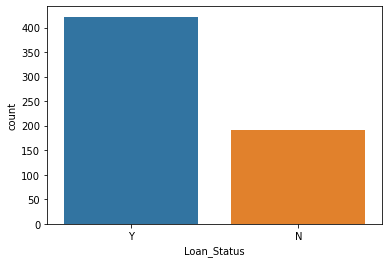

In [28]:
## let's see it visually
sns.countplot(data=data, x='Loan_Status')
plt.show()

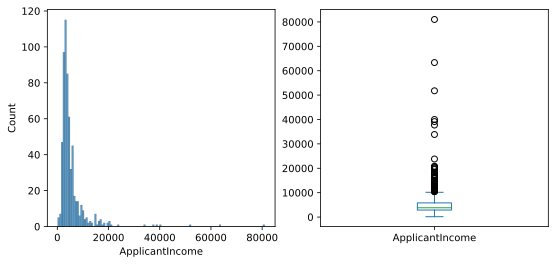

In [33]:
#Income of the applicant
plt.subplot(121)
sns.histplot(data["ApplicantIncome"])

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(9,4))
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

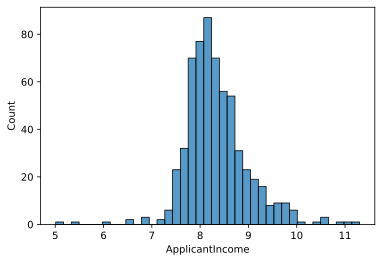

In [34]:
sns.histplot(np.log(data["ApplicantIncome"]))

### Education and Income

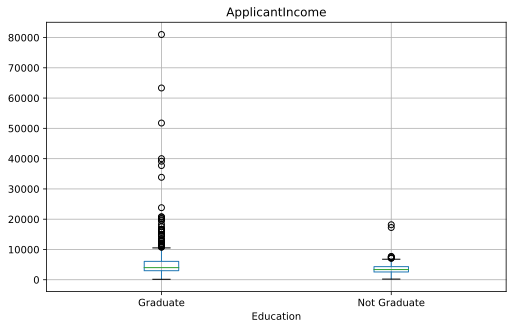

In [35]:
data.boxplot(column='ApplicantIncome', 
             by="Education", figsize=(8,5))

plt.suptitle("")
plt.show()

In [36]:
data["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [37]:
data.groupby(["Education"])["ApplicantIncome"].mean()

Education
Graduate        5857.433333
Not Graduate    3777.283582
Name: ApplicantIncome, dtype: float64

/Users/shvm/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


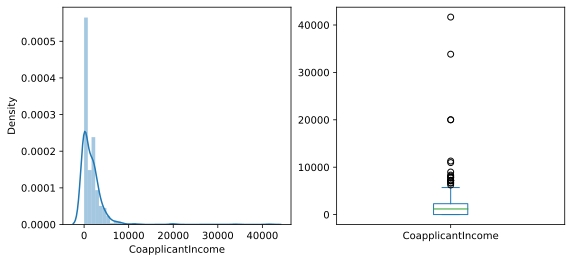

In [38]:
#co-applicant income

plt.subplot(121)
sns.distplot(data["CoapplicantIncome"])

plt.subplot(122)
data["CoapplicantIncome"].plot.box(figsize=(9,4))
plt.show()

/Users/shvm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

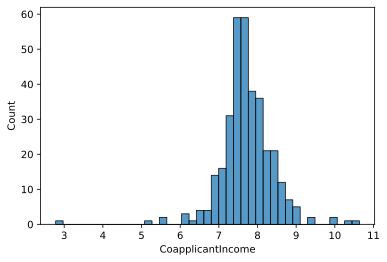

In [39]:
sns.histplot(np.log(data["CoapplicantIncome"]))

### Loan status and Income

In [40]:
data.groupby("Loan_Status").mean()['ApplicantIncome']

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

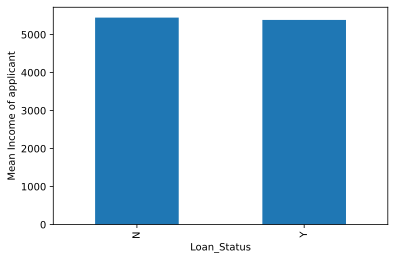

In [41]:
data.groupby("Loan_Status").mean()['ApplicantIncome'].plot.bar()
plt.ylabel("Mean Income of applicant")
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

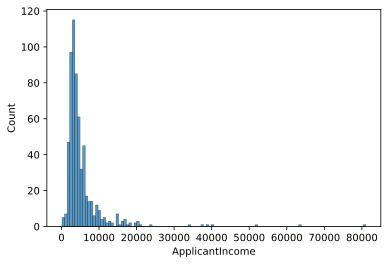

In [42]:
sns.histplot(data["ApplicantIncome"])

## Binning

In [45]:
## elementary bins (decided acc. to business)
bins=[0, 2500, 4000, 6000, 8000, 10000,
      20000, 40000, 81000]

group=['Low','Average','medium', 'h1', 'h2',
       'h3', 'h4' , 'Very high']

data["Income_bin"] = pd.cut(data['ApplicantIncome'],
                           bins = bins, 
                           labels = group)

In [46]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium


In [48]:
pd.crosstab(data["Income_bin"],
            data["Loan_Status"], normalize="index")

Loan_Status,N,Y
Income_bin,,
Low,0.314815,0.685185
Average,0.296460,0.703540
medium,0.314685,0.685315
h1,0.370370,0.629630
h2,0.290323,0.709677
h3,0.325000,0.675000
h4,0.333333,0.666667
Very high,0.333333,0.666667


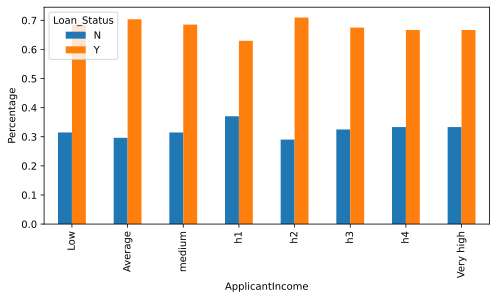

In [49]:
Income_bin = pd.crosstab(data["Income_bin"],
                         data["Loan_Status"],
                         normalize="index")

Income_bin.plot(kind="bar",figsize=(8,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [50]:
#co-appplicant income
bins=[0,1000,3000,42000]
group =['Low','Average','High']
data['CoapplicantIncome_bin'] = pd.cut(data["CoapplicantIncome"],
                                       bins,
                                       labels=group)

In [51]:
pd.crosstab(data["CoapplicantIncome_bin"],
            data["Loan_Status"])

Loan_Status,N,Y
CoapplicantIncome_bin,,
Low,3,19
Average,61,161
High,32,65


In [52]:
pd.crosstab(data["CoapplicantIncome_bin"],
            data["Loan_Status"], normalize="index")

Loan_Status,N,Y
CoapplicantIncome_bin,,
Low,0.136364,0.863636
Average,0.274775,0.725225
High,0.329897,0.670103


In [53]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

In [54]:
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],
                                 bins,labels=group)

In [55]:
total_income_crosstab = pd.crosstab(data["TotalIncome_bin"], 
                                    data["Loan_Status"])
total_income_crosstab

Loan_Status,N,Y
TotalIncome_bin,,
Low,20,27
Average,69,154
High,61,151
Very High,42,90


In [56]:
pd.crosstab(data["TotalIncome_bin"], 
            data["Loan_Status"],
            normalize="index")

Loan_Status,N,Y
TotalIncome_bin,,
Low,0.425532,0.574468
Average,0.309417,0.690583
High,0.287736,0.712264
Very High,0.318182,0.681818


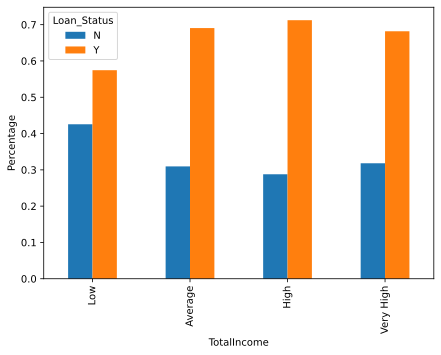

In [57]:
TotalIncome = pd.crosstab(data["TotalIncome_bin"],
                          data["Loan_Status"],
                          normalize="index")

TotalIncome.plot(kind='bar', figsize=(7,5))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()


In [58]:
total_income_crosstab

Loan_Status,N,Y
TotalIncome_bin,,
Low,20,27
Average,69,154
High,61,151
Very High,42,90


In [59]:
from scipy.stats import chi2_contingency

In [60]:
# H0: The two features not dependent (independent)
# Ha : Two features are dependent

chi2_contingency(total_income_crosstab) #chi stat, p value, df, expected freq


(3.428480885250809,
 0.3301570564076713,
 3,
 array([[ 14.6970684 ,  32.3029316 ],
        [ 69.73289902, 153.26710098],
        [ 66.29315961, 145.70684039],
        [ 41.27687296,  90.72312704]]))

In [ ]:
# p-value is high, so we "fail to reject" (we accept H0)
# The two features are independent 
    
# Income and Loan Approval doesn't have Statistically Significant relationship

### Gender Vs Approval

In [61]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,CoapplicantIncome_bin,TotalIncome,TotalIncome_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium,NaN,5849.0,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,Average,6091.0,High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,NaN,6000.0,High


In [62]:
gender_loan_status = pd.crosstab(data["Gender"],
                                 data["Loan_Status"])
gender_loan_status

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [63]:
chi2_contingency(gender_loan_status) # chi stat, p-value, df, expected freq

(0.13962612116543877,
 0.7086529816451106,
 1,
 array([[ 34.84858569,  77.15141431],
        [152.15141431, 336.84858569]]))

In [64]:
# p-value is high, so we "fail to reject" (we accept H0)
# The two features are independent 

# Gender and Loan Approval doesn't have Statistically Significant relationship

###  Education Vs Approval

In [65]:
education_loan_status = pd.crosstab(data["Education"],
                                    data["Loan_Status"])
education_loan_status

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [66]:
pd.crosstab(data["Education"], 
            data["Loan_Status"], normalize="index")

Loan_Status,N,Y
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


In [67]:
# H0: education and loan status are independent
chi2_contingency(education_loan_status) # chi stat, p-value, df, expected freq

(4.091490413303621,
 0.04309962129357355,
 1,
 array([[150.09771987, 329.90228013],
        [ 41.90228013,  92.09771987]]))

In [ ]:
# p-value is small. Even at a 95% confidence, we reject the null hypothesis
# Education and loan status are not independent

# Education and Loan Approval have Statistically Significant relationship (alpha = 0.05)

In [69]:
# male_low_income = Y/N

## Education vs Income

In [70]:
pd.crosstab(data["Education"], 
            data["Income_bin"])

Income_bin,Low,Average,medium,h1,h2,h3,h4,Very high
Education,,,,,,,,
Graduate,77,165,116,41,31,38,9,3
Not Graduate,31,61,27,13,0,2,0,0


In [71]:
# H0: education and income are indpendent
education_income = pd.crosstab(data["Education"], 
                               data["Income_bin"]).values
print(education_income)
chi2_contingency(education_income)

[[ 77 165 116  41  31  38   9   3]
 [ 31  61  27  13   0   2   0   0]]


(26.059039478566042,
 0.0004915793580751666,
 7,
 array([[ 84.42996743, 176.67752443, 111.79153094,  42.21498371,
          24.23452769,  31.27035831,   7.03583062,   2.34527687],
        [ 23.57003257,  49.32247557,  31.20846906,  11.78501629,
           6.76547231,   8.72964169,   1.96416938,   0.65472313]]))

In [ ]:
# p-value is very small and we reject H0
# Education and income are statistically dependent

### Property area vs Income

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

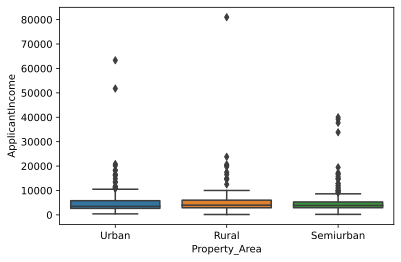

In [73]:
sns.boxplot(x='Property_Area',
            y='ApplicantIncome', 
            data=data)

In [74]:
data.groupby(["Property_Area"])["ApplicantIncome"].mean()

Property_Area
Rural        5554.083799
Semiurban    5292.261803
Urban        5398.247525
Name: ApplicantIncome, dtype: float64

In [75]:
from scipy.stats import f_oneway

In [77]:
a = data[data["Property_Area"]=="Urban"]["ApplicantIncome"]
b = data[data["Property_Area"]=="Rural"]["ApplicantIncome"]
c = data[data["Property_Area"]=="Semiurban"]["ApplicantIncome"]

In [78]:
f_oneway(a, b, c)

F_onewayResult(statistic=0.09280511472442918, pvalue=0.9113839401724976)

## CC fraud detection

In [ ]:
# user_id_1, txn_amt, timestamp 
# user_id_1, txn_amt, timestamp
# user_id_1, txn_amt, timestamp
# user_id_1, txn_amt, timestamp
# user_id_1, txn_amt, timestamp
# user_id_1, txn_amt, timestamp
# user_id_1, txn_amt, timestamp
# user_id_1, txn_amt, timestamp

# user_id_1, txn_amt, timestamp >>>> Fraud/not

In [ ]:
## feature_you_hypothesised = 
# number of txn in last 5 min prior to current txn
